# Google Playstore Analysis

Pada project ini akan didemonstrasikan beberapa tahapan dalam proses data analysis yang berupa _Data Preprocessing, Data Wrangling_, dan _Data Visualization_. Kemudian akan dibangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot yang merupakan hasil _insight_ dari analisis data ini.

## Data Summary
Data yang digunakan pada capstone project ini adalah data hasil scraping dari Google Playstore App. Data Google Playstore App terdiri dari beberapa variabel dengan rincian sebagai berikut:
- `App` : Nama aplikasi                
- `Category` : Kategori aplikasi
- `Rating` : Rating keseluruhan yang diberikan oleh user aplikasi (ketika di scrap)
- `Reviews` : Jumlah review yang diberikan oleh user aplikasi (ketika di scrap)
- `Size` : Ukuran aplikasi (ketika di scrap)           
- `Installs` : Jumlah user yang menginstall/mendownload aplikasi (Ketika di scrap)     
- `Type` : Tipe aplikasi (berbayar/gratis)       
- `Price` : Harga aplikasi (ketika di scrap)        
- `Content Rating` : Kelompok usia aplikasi ini ditargetkan - Children / Mature 21+ / Adult   
- `Genres` : Genre aplikasi.        
- `Last Updated` : Tanggal kapan aplikasi terakhir diperbarui di Play Store (ketika discrap) 
- `Current Ver` : Versi aplikasi saat ini tersedia di Play Store (ketika discrap)   
- `Android Ver` : Minimum versi Android yang diperlukan (ketika discrap) 

## Data Preprocessing

**Import library**

In [1]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Membaca file `googleplaystore.csv` data dan menyimpan ke objek dataframe dengan nama playstore.

In [2]:
playstore = pd.read_csv('data/googleplaystore.csv')

In [3]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Data Cleansing** 

Menghapus data yang duplikat berdasarkan kolom App, dengan tetap menyimpan data pertama.

In [4]:
playstore.drop_duplicates(subset = 'App', keep = 'first', inplace=True) 

In [5]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar.

In [6]:
playstore.drop([10472], inplace=True)

Mengecek tipe data kolom Category. Dan mengubah ke tipe data yang sesuai, jika masih terdapat data yang tersimpan dengan format tipe data yang salah.


In [7]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
playstore.Category = playstore['Category'].astype('category')

In [9]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

Membuang tanda koma(,) dan tanda tambah(+) pada kolom Installs, dan kemudian mengubah tipe datanya menjadi integer.

In [10]:
playstore.Installs = playstore['Installs'].apply(lambda x: x.replace(',',''))
playstore.Installs = playstore['Installs'].apply(lambda x: x.replace('+',''))

In [11]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Bagian ini untuk merapihkan kolom Size.

In [12]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)


Membuang karakater $ pada nilai Price, lalu mengubah tipe datanya menjadi float.

In [13]:
playstore.Price = playstore['Price'].apply(lambda x: x.replace('$',''))
playstore.Price = playstore['Price'].astype('float64')

Mengubah tipe data Reviews, Size, Installs ke dalam tipe data integer.

In [14]:
playstore[['Reviews','Size','Installs']] = playstore[['Reviews','Size','Installs']].astype('int64')


In [15]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [16]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13134701,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Data Wrangling

In [17]:
df2 = playstore.copy()

Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 

In [18]:
top_category = pd.crosstab(
                    index = df2['Category'],
                    columns = 'Jumlah'
                    ).sort_values(by = 'Jumlah', ascending = False).reset_index()

In [19]:
top_category.head()

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


In [20]:
top_category.head()

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`.

In [21]:
most_categories = top_category['Category'].loc[0]
total = top_category['Jumlah'].loc[0]

In [22]:
most_categories

'FAMILY'

In [23]:
total

1832

`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Digunakan agregasi data menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

In [24]:
rev_table = df2[['Category','App','Reviews','Rating']]\
.groupby(['Category','App']).agg({'Reviews':'sum', 'Rating':'mean'})\
.sort_values(by = 'Reviews', ascending = False).reset_index().head(10)

In [25]:
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316,4.4
2,SOCIAL,Instagram,66577313,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847,4.0
4,GAME,Clash of Clans,44891723,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526,4.7
6,GAME,Subway Surfers,27722264,4.5
7,VIDEO_PLAYERS,YouTube,25655305,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
9,GAME,Clash Royale,23133508,4.6


## Data Visualization

**Membuat Bar Plot Horizontal**

Berikut merupakan tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Kemudian akan dibuat bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian diurutkan dari jumlah terbanyak.

In [26]:
df2.groupby('Category').agg({
'App' : 'count'
 }).rename({'Category':'Total'}, axis=1).sort_values(by = 'App', ascending=False).reset_index().head(5)

,Category,App
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


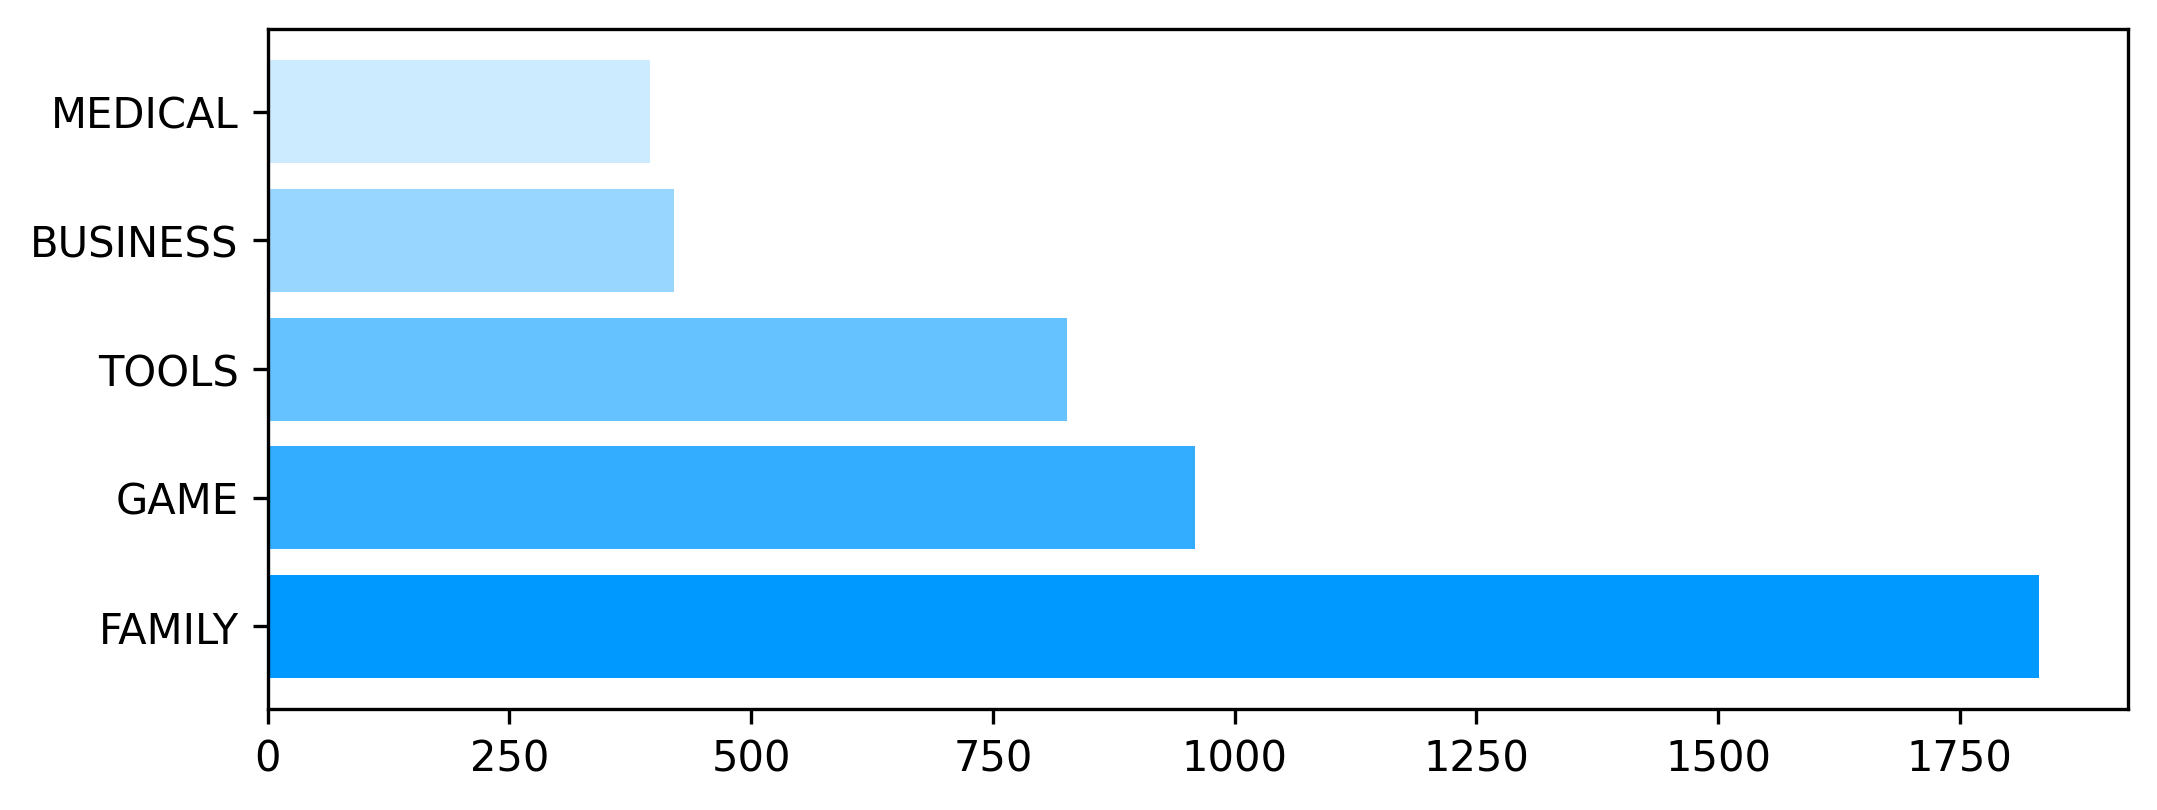

In [33]:
cat_order = df2.groupby('Category').agg({
'App' : 'count'
 }).rename({'Category':'Total'}, axis=1).sort_values(by = 'App', ascending=False).reset_index().head(5)
X = cat_order['Category']
Y = cat_order['App']
my_colors = ['#0099ff','#33adff','#66c2ff', '#99d6ff', '#ccebff']
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(X, Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

_Kesimpulan:_ Berdasarkan plot yang dihasilkan, dapat dilihat bahwa aplikasi yang mendominasi google playstore adalah aplikasi yang termasuk kedalam category 'Family', 'Game', 'Tools', 'Business', dan 'Medical'. 

**Membuat Scatter Plot**

Berikut merupakan scatter plot yang menampilkan hubungan dan persebaran aplikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi. 
    

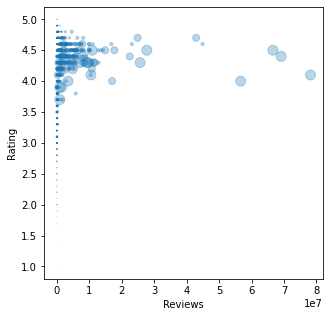

In [28]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x= X,y= Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

_Kesimpulan:_ Berdasarkan scatter plot yang dihasilkan, dapat dilihat bahwa terjadi pengumpulan data di suatu area, yakni pada area dimana terdapat 0 - 10.000.000 reviews dan 3.5 - 5.0 rating. Maka dapat disimpulkan, kebanyakan aplikasi pada google playstore memiliki 0 - 10.000.000 reviews dan 3.5 - 5.0 rating.

**Membuat Histogram Size Distribution**

Berikut merupakan sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang akan terbentuk terbagi menjadi 100 bins.

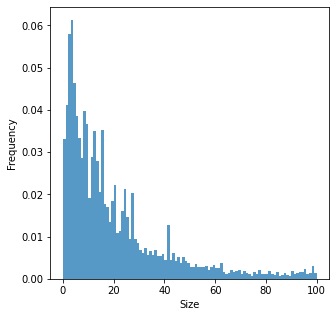

In [29]:
X=(df2['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X ,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

_Kesimpulan:_ Berdasarkan plot yang dihasilkan, dapat dilihat bahwa distribusi Size aplikasi pada google playstore paling banyak memiliki size diantara 0 hingga 20 MB.

**Membuat Bar Plot**

Berikut merupakan tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan rata - rata harga untuk setiap kategori. Kemudian akan dibuat bar plot dimana axis x adalah nama Category dan axis y adalah rata - rata harga pada setiap kategori, kemudian diurutkan dari jumlah terbanyak.

In [30]:
top_price = pd.crosstab(
                    index = df2['Category'],
                    columns = 'Average Price',
                    values = df2['Price'],
                    aggfunc = 'mean'
                    ).sort_values(by = 'Average Price', ascending = False).reset_index().head(5)

top_price

col_0,Category,Average Price
0,FINANCE,8.408203
1,LIFESTYLE,6.398022
2,MEDICAL,2.520759
3,EVENTS,1.718594
4,FAMILY,1.309967


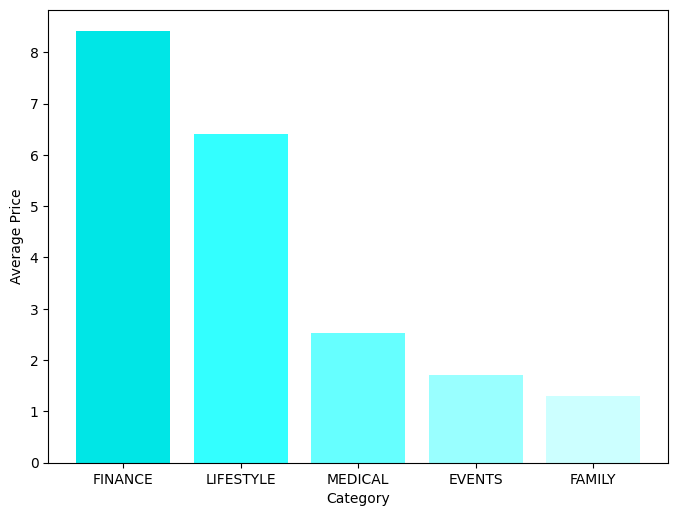

In [38]:
## 5 kategori aplikasi dengan rata-rata harga paling tinggi

top_price = pd.crosstab(
                    index = df2['Category'],
                    columns = 'Average Price',
                    values = df2['Price'],
                    aggfunc = 'mean'
                    ).sort_values(by = 'Average Price', ascending = False).reset_index().head(5)
X = top_price['Category']
Y = top_price['Average Price']
my_colors2 = ['#00e6e6','#33ffff','#66ffff','#99ffff','#ccffff']
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,6),dpi=100)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.bar(X, Y, color=my_colors2)
plt.xlabel('Category')
plt.ylabel('Average Price')
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('top_price.png',bbox_inches="tight") 

_Kesimpulan:_ Berdasarkan plot yang dihasilkan, dapat dilihat bahwa aplikasi dengan rata - rata harga termahal pada google playstore adalah aplikasi yang termasuk kedalam category 'Finance', dengan rata - rata harga aplikasi dalam category tersebut adalah sebesar 8.4 USD.